### Data from [Kaggle Breast Cancer Wisconsin (Diagnostic) Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
data = pd.read_csv('../data/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
pandas_profiling.ProfileReport(data)

/Users/kathrynklarich1/anaconda/lib/python3.6/site-packages/pandas_profiling/base.py:223: RuntimeWarning: divide by zero encountered in long_scalars
  'p_unique': distinct_count / count}


Number of variables,33
Number of observations,569
Total Missing (%),3.0%
Total size in memory,146.8 KiB
Average record size in memory,264.1 B
Numeric,21
Categorical,1
Date,0
Text (Unique),0
Rejected,11
Constant value,


In [4]:
# Get rid of unnecessary features and those that are repetitive
data = data.drop(['id', 'Unnamed: 32', 'area_mean', 'area_se', 'area_worst', 'concave points_mean', 
                  'concave points_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst', 'radius_worst', 
                  'texture_worst'], axis=1)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [6]:
data.shape

(569, 21)

In [7]:
# Get rid of non-mean columns (ignore std error for now)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
data = data[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
               'symmetry_mean', 'fractal_dimension_mean']]
columns = ['diagnosis', 'radius', 'texture', 'smoothness', 'compactness', 'concavity', 'symmetry', 'fractal']
data.columns = columns
data.head()

,diagnosis,radius,texture,smoothness,compactness,concavity,symmetry,fractal
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883


In [9]:
data.shape

(569, 8)

In [10]:
data.describe()

,radius,texture,smoothness,compactness,concavity,symmetry,fractal
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.181162,0.062798
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.027414,0.007060
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.161900,0.057700
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.179200,0.061540
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.195700,0.066120
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.304000,0.097440


In [11]:
data.groupby('diagnosis').describe()

compactness   concavity     fractal      radius  smoothness  \
diagnosis                                                                      
B         count   357.000000  357.000000  357.000000  357.000000  357.000000   
          mean      0.080085    0.046058    0.062867   12.146524    0.092478   
          std       0.033750    0.043442    0.006747    1.780512    0.013446   
          min       0.019380    0.000000    0.051850    6.981000    0.052630   
          25%       0.055620    0.020310    0.058530   11.080000    0.083060   
          50%       0.075290    0.037090    0.061540   12.200000    0.090760   
          75%       0.097550    0.059990    0.065760   13.370000    0.100700   
          max       0.223900    0.410800    0.095750   17.850000    0.163400   
M         count   212.000000  212.000000  212.000000  212.000000  212.000000   
          mean      0.145188    0.160775    0.062680   17.462830    0.102898   
          std       0.053987    0.075019    0.007573    3.203971    0.012608   
          min       0.046050    0.023980    0.049960   10.950000    0.073710   
          25%       0.109600    0.109525    0.056598   15.075000    0.094010   
          50%       0.132350    0.151350    0.061575   17.325000    0.102200   
          75%       0.172400    0.203050    0.067075   19.590000    0.110925   
          max       0.345400    0.426800    0.097440   28.110000    0.144700   

                   symmetry     texture  
diagnosis                                
B         count  357.000000  357.000000  
          mean     0.174186   17.914762  
          std      0.024807    3.995125  
          min      0.106000    9.710000  
          25%      0.158000   15.150000  
          50%      0.171400   17.390000  
          75%      0.189000   19.760000  
          max      0.274300   33.810000  
M         count  212.000000  212.000000  
          mean     0.192909   21.604906  
          std      0.027638    3.779470  
          min      0.130800   10.380000  
          25%      0.174050   19.327500  
          50%      0.189900   21.460000  
          75%      0.209850   23.765000  
          max      0.304000   39.280000

### In general, the std deviations and means are high for the malignant cells versus the benign cells

In [12]:
def box_plot(df, grouping):
    '''takes a data frame and a grouping, returns a box plot of each column, 
    grouped by the grouping'''
    
    for col in df:
        try:
            df[[col, grouping]].boxplot(by=grouping, fontsize=11, figsize=(4, 4))
        except:
            pass

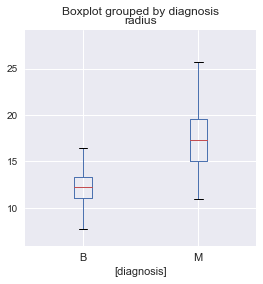

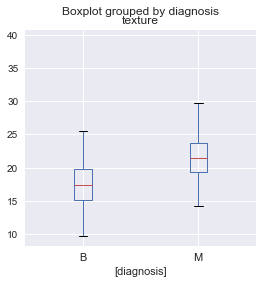

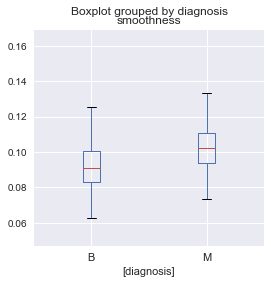

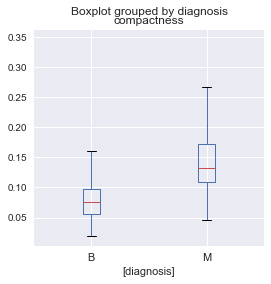

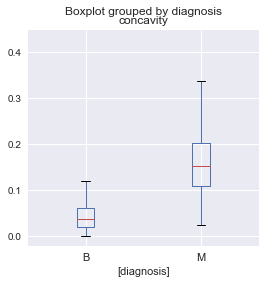

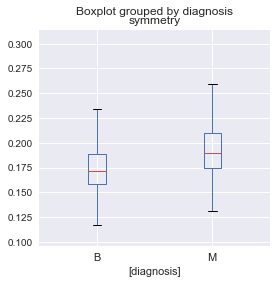

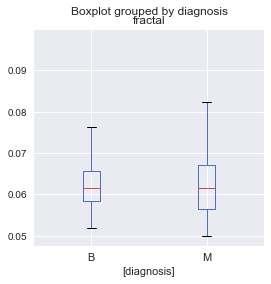

In [13]:
box_plot(data, 'diagnosis')

### Malignant cells have higher values for most measurements. Radius, texture, smoothness, compactness and concavity are of particular interest as their distributions appear to be quite different for malignant versus benign cells. 

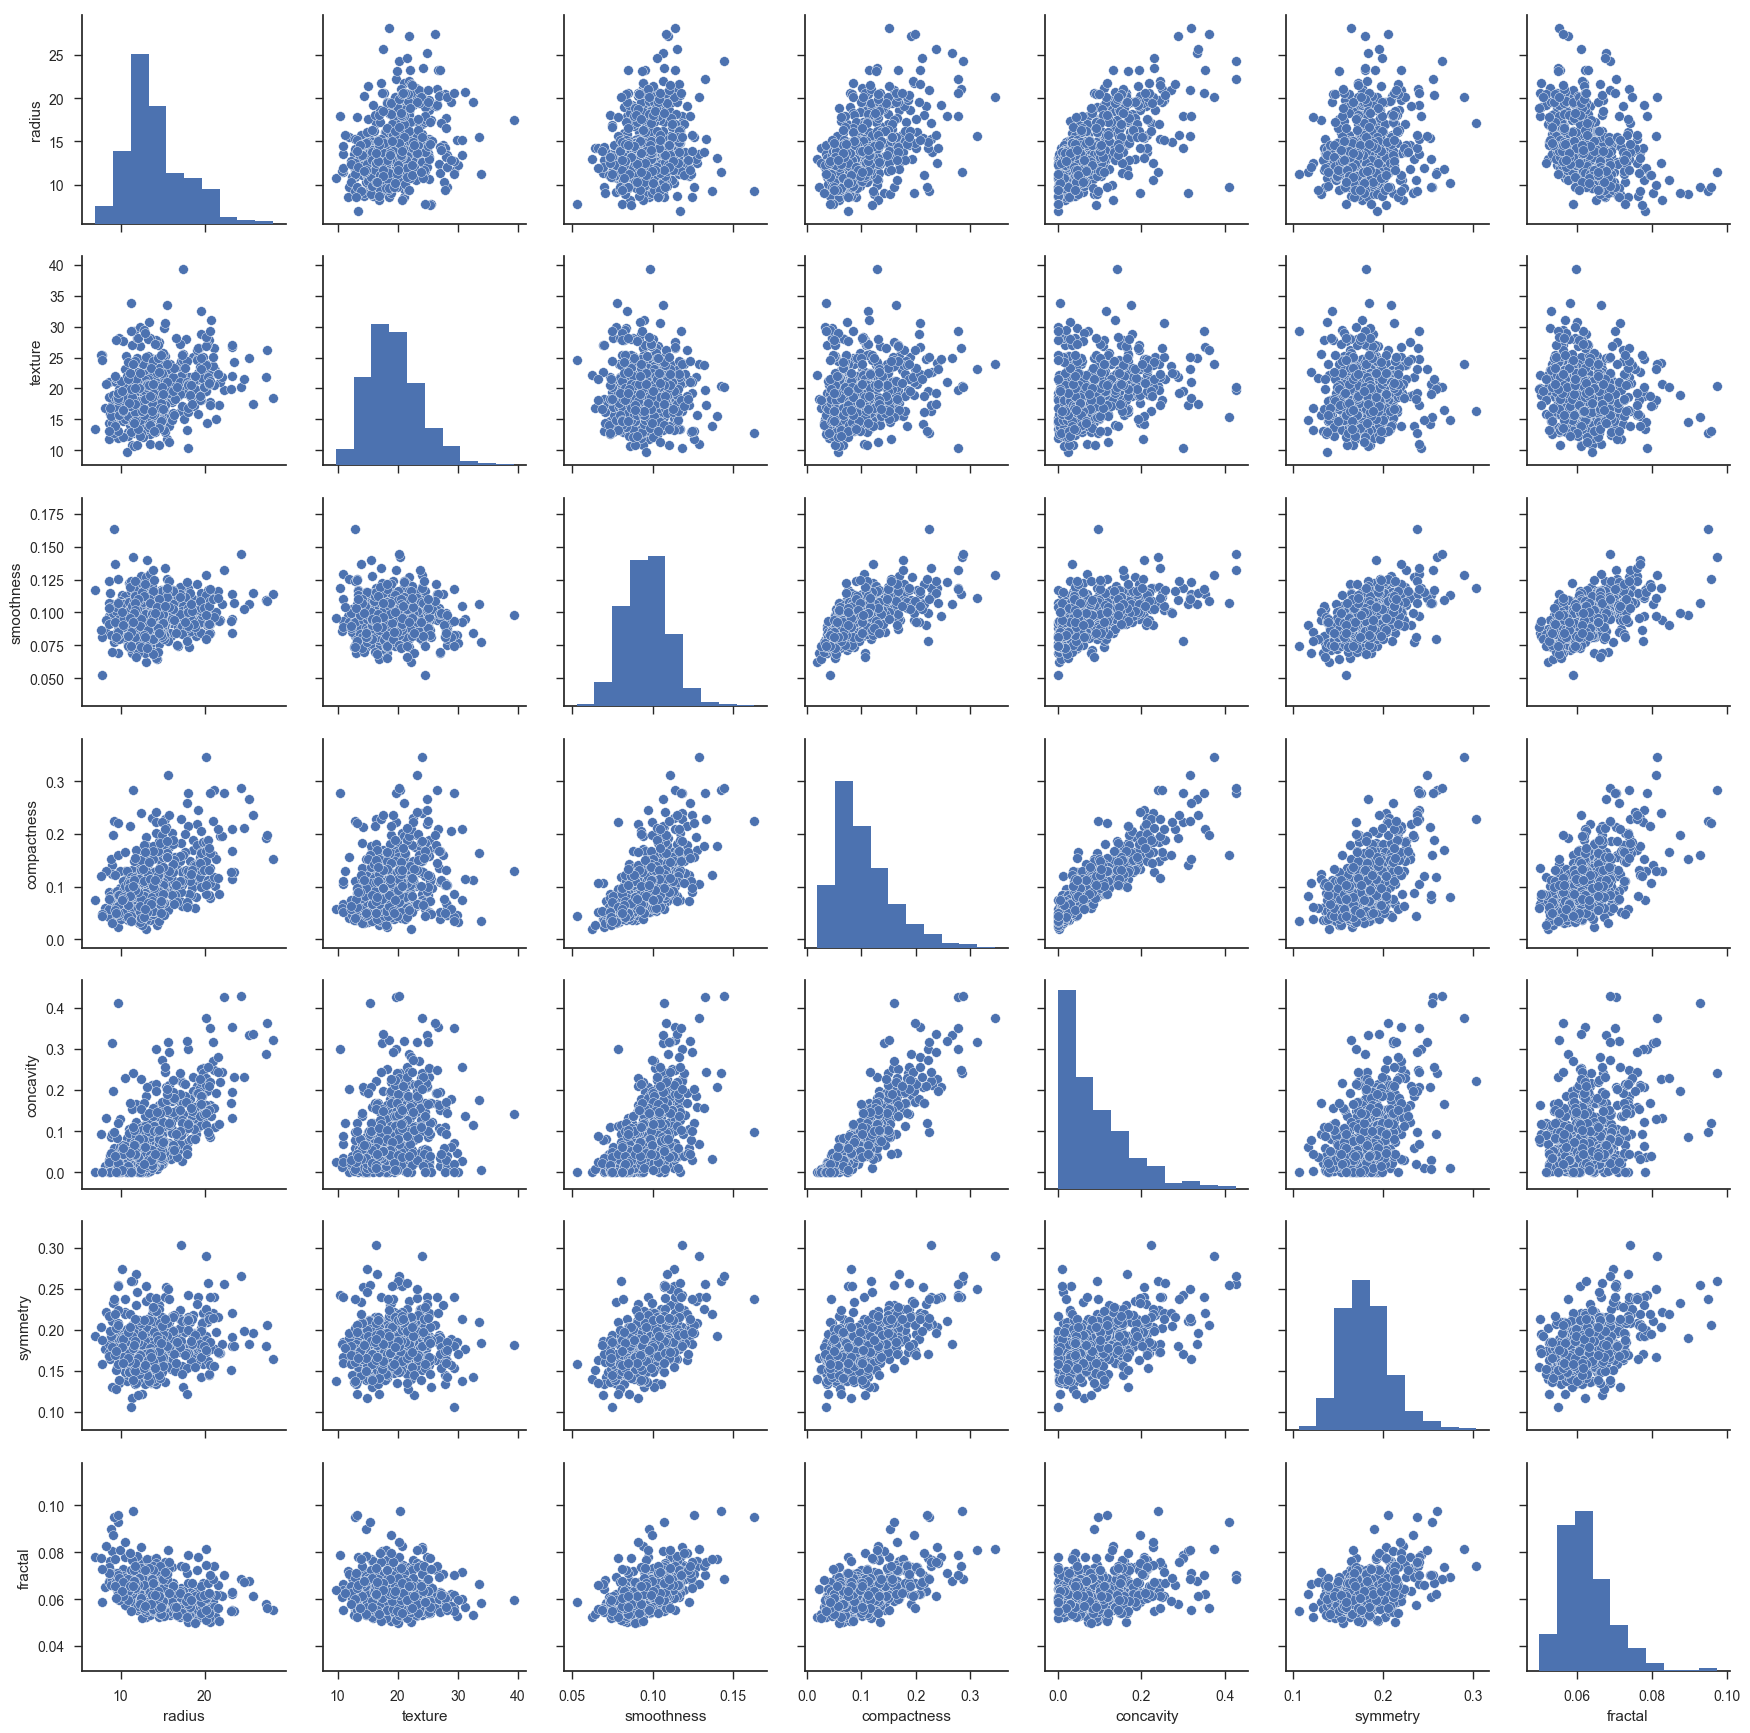

In [15]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data)

In [13]:
corr_matrix = data.corr()

In [14]:
corr_matrix[['radius', 'texture', 'smoothness', 'compactness', 'concavity', 'symmetry', 'fractal']]

,radius,texture,smoothness,compactness,concavity,symmetry,fractal
radius,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,-0.311631
texture,0.323782,1.000000,-0.023389,0.236702,0.302418,0.071401,-0.076437
smoothness,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792
compactness,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369
concavity,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921
fractal,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.479921,1.000000


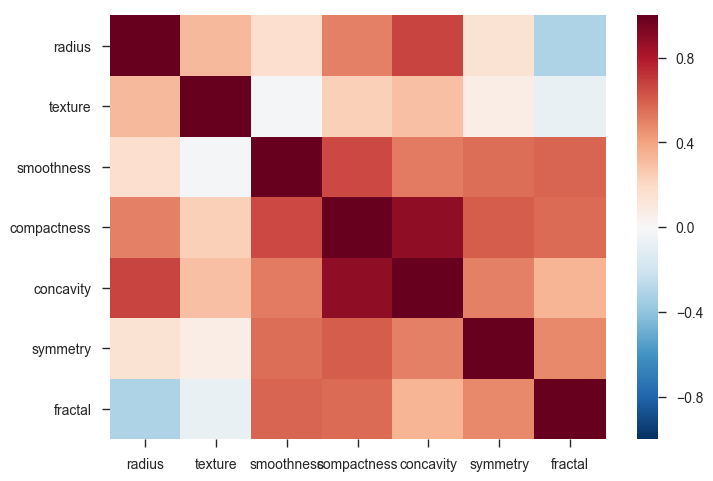

In [23]:
sns.heatmap(corr_matrix[['radius', 'texture', 'smoothness', 'compactness', 'concavity', 
                         'symmetry', 'fractal']])

### There seems to be strong correlation between compactness and factal, symmetry, concavity and smoothness. There are many other strong correlations including smoothness and factal, smoothness and symmetry, concavity and radius. There is an inverse correlation between fractal and radius. 

In [15]:
malignant = data[data.diagnosis == 'M']
benign = data[data.diagnosis == 'B']

In [16]:
def histograms(df1, df2, label1, label2):
    
    for col in df1:
        try:
            plt.hist(df1[col], alpha=0.5, label=label1, edgecolor='k')
            plt.hist(df2[col], alpha=0.5, label=label2, edgecolor='k')
            plt.legend(loc='upper right')
            plt.title(col)
            plt.show()
            
        except:
            pass

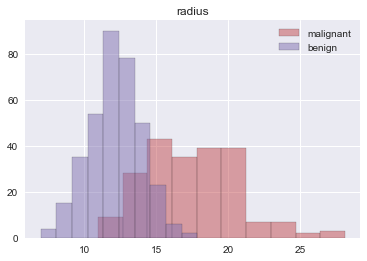

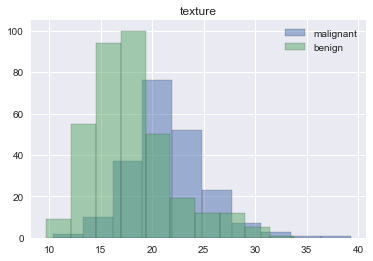

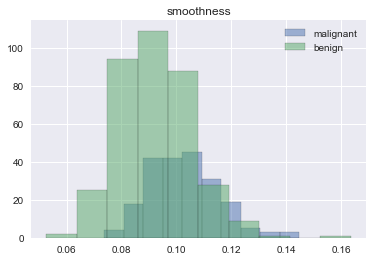

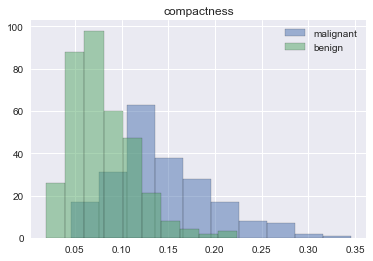

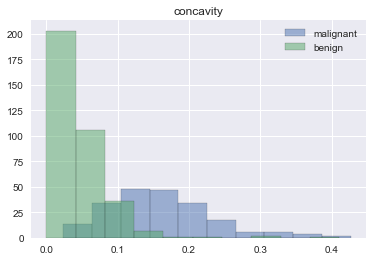

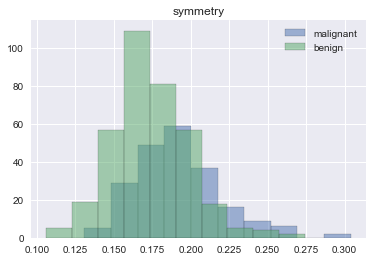

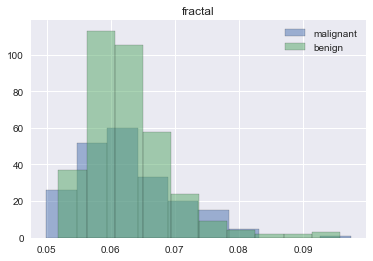

In [18]:
histograms(malignant, benign, 'malignant', 'benign')

### The distribution malignant and benign cells looks quite different for concavity and radius. It may be work exploring these more in depth. 

# Classification
### We will use the ROC curve to measure the error of classification algorithms since the ROC curve is more sensitive to false negatives thant the PR curve, and a flase negative for breast cancer is very bad. 

In [17]:
data['diagnosis'] = data['diagnosis'] == 'M'
data['diagnosis'] = data.diagnosis.apply(lambda x: int(x))

In [18]:
data.head()

,diagnosis,radius,texture,smoothness,compactness,concavity,symmetry,fractal
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [76]:
X = data[['radius', 'texture', 'smoothness', 'compactness', 'concavity', 'symmetry', 'fractal']]
y = data['diagnosis']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardize the data

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### 1. SCG Classifier

In [81]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='log')

In [139]:
sgd_acc = cross_val_score(sgd_clf, X_train_std, y_train, cv=3, scoring="accuracy")
sgd_acc

array([ 0.90849673,  0.9205298 ,  0.8807947 ])

In [140]:
sgd_proba = cross_val_predict(sgd_clf, X_train_std, y_train, cv=3, method='predict_proba')
sgd_scores = sgd_proba[:, 1] # get the score of the positive class

### 2. Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
lr = LogisticRegression()

In [143]:
lr_acc = cross_val_score(lr, X_train_std, y_train, cv=3, scoring='accuracy')
lr_acc

array([ 0.94117647,  0.93377483,  0.92715232])

In [144]:
lr_proba = cross_val_predict(lr, X_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

### 3. Random forests

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf = RandomForestClassifier(random_state=42)

In [147]:
rf_acc = cross_val_score(rf, X_train_std, y_train, cv=3)
rf_acc

array([ 0.89542484,  0.92715232,  0.90728477])

In [148]:
rf_proba = cross_val_predict(rf, X_train_std, y_train, cv=3, method='predict_proba')
rf_scores = rf_proba[:, 1] # Get the probability of the positive class

### Compare classifiers

In [149]:
print('''sgd classifier accuracy = {:.2f}
logistic regression classifier accuracy = {:.2f} 
random forest classifier accuracy = {:.2f}'''.format(np.average(sgd_acc), np.average(lr_acc), np.average(rf_acc)))

sgd classifier accuracy = 0.90
logistic regression classifier accuracy = 0.93 
random forest classifier accuracy = 0.91


#### All of the classifiers work reasonably well, though logistic regression performs best. 

### Evaluate the ROC curve and AUC score for each classifier

In [150]:
from sklearn.metrics import roc_auc_score

def ROC_curve(title, y_train, scores, label=None):
    
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (logistic regression): 0.98 


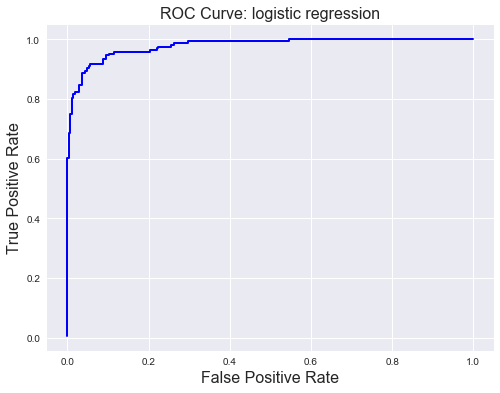

In [151]:
ROC_curve('logistic regression', y_train, lr_scores)

AUC Score (sgd classifier): 0.97 


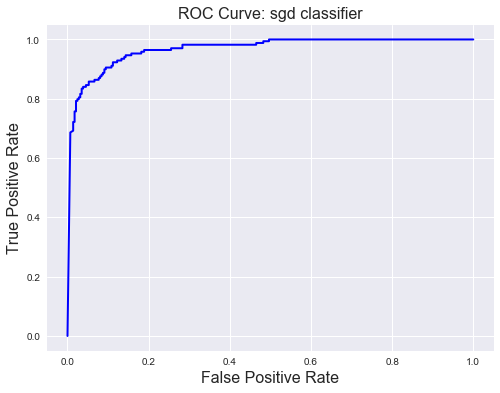

In [152]:
ROC_curve('sgd classifier', y_train, sgd_scores)

AUC Score (random forest): 0.96 


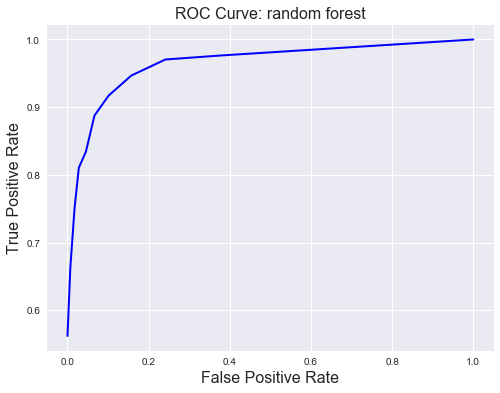

In [153]:
ROC_curve('random forest', y_train, rf_scores)

### Again, all of the classifiers perform pretty well, though logistic regression and SGD classifier look best. 

In [154]:
from sklearn.metrics import precision_score, recall_score

# Logistic regression
y_train_pred_lr = cross_val_predict(lr, X_train_std, y_train, cv=3)
lr_precision = precision_score(y_train, y_train_pred_lr)
lr_recall = recall_score(y_train, y_train_pred_lr)

# SGD Classifier
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train_std, y_train, cv=3)
sgd_precision = precision_score(y_train, y_train_pred_sgd)
sgd_recall = recall_score(y_train, y_train_pred_sgd)

# Random forest
y_train_pred_rf = cross_val_predict(rf, X_train_std, y_train, cv=3)
rf_precision = precision_score(y_train, y_train_pred_rf)
rf_recall = recall_score(y_train, y_train_pred_rf)

In [155]:
print('''Precision scores:
Logistic Regression = {:.2f}
SGD Classifier = {:.2f}
Random Forest = {:.2f}'''.format(lr_precision, sgd_precision, rf_precision))

Precision scores:
Logistic Regression = 0.93
SGD Classifier = 0.87
Random Forest = 0.92


In [156]:
print('''Recall scores:
Logistic Regression = {:.2f}
SGD Classifier = {:.2f}
Random Forest = {:.2f}'''.format(lr_recall, sgd_recall, rf_recall))

Recall scores:
Logistic Regression = 0.89
SGD Classifier = 0.88
Random Forest = 0.83


#### Logistic regression has the best precision and recall out of the three algorithms. Since we care more about recall (due to the high cost of false negatives), random forest does not seem like a good option as it has the lowest recall.

## Gridsearch CV

In [157]:
from sklearn.model_selection import GridSearchCV

### Use Gridsearch CV to find the best parameters for logistic regression.

In [158]:
param_grid = [{'class_weight': ['balanced', None], 'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000]}]

lr_clf = LogisticRegression()
grid_search = GridSearchCV(lr_clf, param_grid, cv=3, verbose=1, return_train_score = True)

In [159]:
grid_search.fit(X_train_std, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'class_weight': ['balanced', None], 'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [160]:
grid_search.best_params_

{'C': 0.1, 'class_weight': None}

In [163]:
print('''best score = {:.2f}'''.format(grid_search.best_score_))

best score = 0.93


#### The accuracy doesn't imporve very much (if at all) 

In [164]:
from sklearn.metrics import accuracy_score

y_bp_lr_pred = grid_search.predict(X_test_std)
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_bp_lr_pred)))

accuracy: 0.96


#### There is no loss in accuracy on the test set - the model appears to generalize well.

In [165]:
# Compute the ROC score using the best params
lr_best_params = LogisticRegression(C=0.1, class_weight=None)

In [166]:
lr_bp_proba = cross_val_predict(lr_best_params, X_train_std, y_train, cv=3, method='predict_proba')
lr_bp_scores = lr_bp_proba[:, 1]

AUC Score (logistic regression - best params): 0.98 


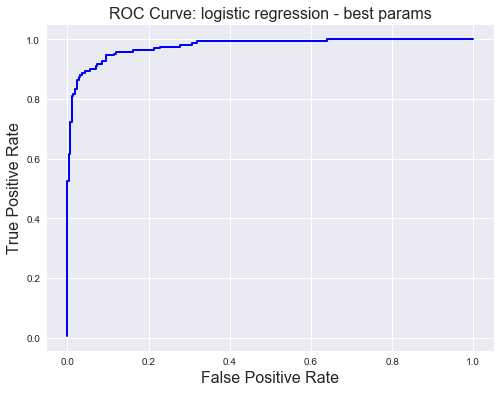

In [167]:
ROC_curve('logistic regression - best params', y_train, lr_bp_scores)

#### The AUC score doesn't improve either, though since it was already at 0.98 there is not a lot of room for improvement

In [168]:
y_train_pred_lr = cross_val_predict(lr_best_params, X_train_std, y_train, cv=3)
lr_precision = precision_score(y_train, y_train_pred_lr)
lr_recall = recall_score(y_train, y_train_pred_lr)

In [172]:
print('precision: {:.2f}'.format(lr_precision))

precision: 0.94


In [173]:
print('recall: {:.2f}'.format(lr_recall))

recall: 0.88


### The final step is to look at the instances that are misclassified by the logistic regression classifier. 

In [174]:
X_test.head()

,radius,texture,smoothness,compactness,concavity,symmetry,fractal
204,12.47,18.60,0.09965,0.1058,0.08005,0.1925,0.06373
70,18.94,21.31,0.09009,0.1029,0.10800,0.1582,0.05461
131,15.46,19.48,0.10920,0.1223,0.14660,0.1931,0.05796
431,12.40,17.68,0.10540,0.1316,0.07741,0.1811,0.07102
540,11.54,14.44,0.09984,0.1120,0.06737,0.1818,0.06782


In [175]:
y_test.to_frame().head()

,diagnosis
204,0
70,1
131,1
431,0
540,0


In [176]:
test = pd.merge(X_test, y_test.to_frame(), how='inner', left_index=True, right_index=True)

In [177]:
test.head()

,radius,texture,smoothness,compactness,concavity,symmetry,fractal,diagnosis
204,12.47,18.60,0.09965,0.1058,0.08005,0.1925,0.06373,0
70,18.94,21.31,0.09009,0.1029,0.10800,0.1582,0.05461,1
131,15.46,19.48,0.10920,0.1223,0.14660,0.1931,0.05796,1
431,12.40,17.68,0.10540,0.1316,0.07741,0.1811,0.07102,0
540,11.54,14.44,0.09984,0.1120,0.06737,0.1818,0.06782,0


In [178]:
test['predict'] = y_bp_lr_pred.tolist()

In [179]:
test.head()

,radius,texture,smoothness,compactness,concavity,symmetry,fractal,diagnosis,predict
204,12.47,18.60,0.09965,0.1058,0.08005,0.1925,0.06373,0,0
70,18.94,21.31,0.09009,0.1029,0.10800,0.1582,0.05461,1,1
131,15.46,19.48,0.10920,0.1223,0.14660,0.1931,0.05796,1,1
431,12.40,17.68,0.10540,0.1316,0.07741,0.1811,0.07102,0,0
540,11.54,14.44,0.09984,0.1120,0.06737,0.1818,0.06782,0,0


In [180]:
test.count()

radius         114
texture        114
smoothness     114
compactness    114
concavity      114
symmetry       114
fractal        114
diagnosis      114
predict        114
dtype: int64

In [181]:
test[test.diagnosis != test.predict]

,radius,texture,smoothness,compactness,concavity,symmetry,fractal,diagnosis,predict
73,13.80,15.79,0.10070,0.12800,0.07789,0.1662,0.06566,1,0
10,16.02,23.24,0.08206,0.06669,0.03299,0.1528,0.05697,1,0
39,13.48,20.82,0.10160,0.12550,0.10630,0.1720,0.06419,1,0
238,14.22,27.85,0.08223,0.10390,0.11030,0.1342,0.06129,0,1


#### Since data set is fairly small and the algorithm is highly accurate, there are only a few instances of misclassified data points in the test set.  Concerningly, 3/4 instances were false negatives, but is hard to make many conclusions about what went wrong with these instances since the sample size is so small. It seems that each of the false negatives have at least one measure that is lower than the mean of the negative class and that most of the measures are below the mean of the positive class. As such these cases may be in the gray area, near the deciding line between positive and negative. 

In [184]:
data.groupby('diagnosis').describe()

compactness   concavity     fractal      radius  smoothness  \
diagnosis                                                                      
0         count   357.000000  357.000000  357.000000  357.000000  357.000000   
          mean      0.080085    0.046058    0.062867   12.146524    0.092478   
          std       0.033750    0.043442    0.006747    1.780512    0.013446   
          min       0.019380    0.000000    0.051850    6.981000    0.052630   
          25%       0.055620    0.020310    0.058530   11.080000    0.083060   
          50%       0.075290    0.037090    0.061540   12.200000    0.090760   
          75%       0.097550    0.059990    0.065760   13.370000    0.100700   
          max       0.223900    0.410800    0.095750   17.850000    0.163400   
1         count   212.000000  212.000000  212.000000  212.000000  212.000000   
          mean      0.145188    0.160775    0.062680   17.462830    0.102898   
          std       0.053987    0.075019    0.007573    3.203971    0.012608   
          min       0.046050    0.023980    0.049960   10.950000    0.073710   
          25%       0.109600    0.109525    0.056598   15.075000    0.094010   
          50%       0.132350    0.151350    0.061575   17.325000    0.102200   
          75%       0.172400    0.203050    0.067075   19.590000    0.110925   
          max       0.345400    0.426800    0.097440   28.110000    0.144700   

                   symmetry     texture  
diagnosis                                
0         count  357.000000  357.000000  
          mean     0.174186   17.914762  
          std      0.024807    3.995125  
          min      0.106000    9.710000  
          25%      0.158000   15.150000  
          50%      0.171400   17.390000  
          75%      0.189000   19.760000  
          max      0.274300   33.810000  
1         count  212.000000  212.000000  
          mean     0.192909   21.604906  
          std      0.027638    3.779470  
          min      0.130800   10.380000  
          25%      0.174050   19.327500  
          50%      0.189900   21.460000  
          75%      0.209850   23.765000  
          max      0.304000   39.280000